<a href="https://colab.research.google.com/github/prashant-gulati/portfolio/blob/main/kmeans_tshirts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To upload a file, run this cell and use the 'Choose Files' button.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
  # You can now access the uploaded file with its name, e.g., fn


Saving design.png to design (2).png
User uploaded file "design (2).png" with length 530575 bytes


image shape: (1102, 1144, 4)
pixels shape for clustering: (1260688, 3)
Performing K-Means clustering with k=5...


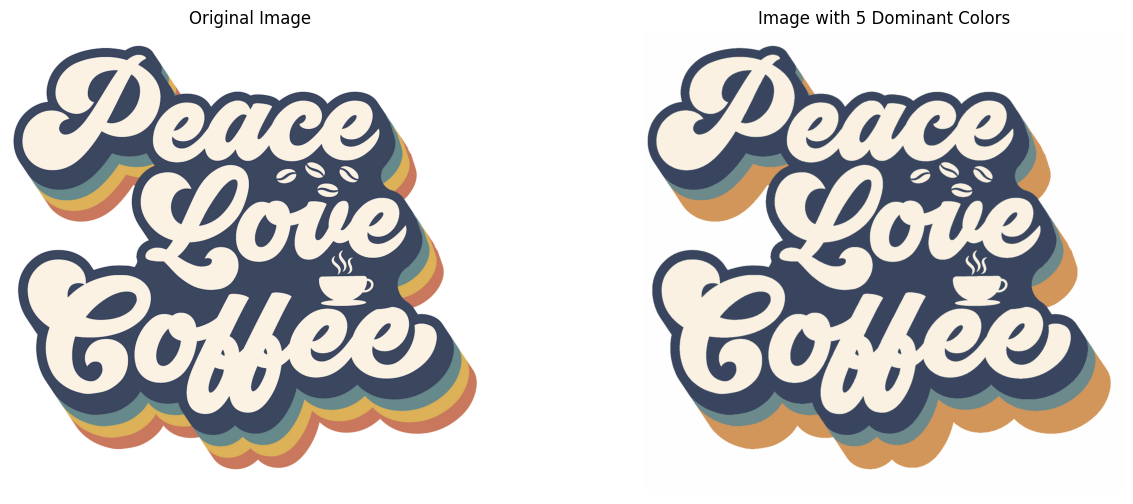


Dominant Colors (RGB):


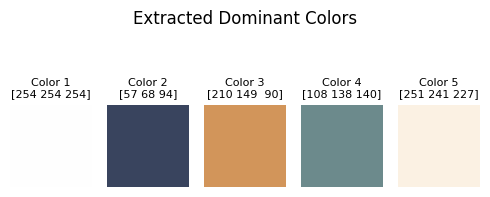

In [ ]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Configuration ---
# Replace 'your_image.jpg' with the actual path to your uploaded image file.
# Example: if you uploaded 'my_picture.png', change it to 'my_picture.png'
image_path = list(uploaded.keys())[0] if uploaded else 'your_image.jpg' # Tries to use uploaded file, otherwise a placeholder

#print(f" {uploaded}")
#print(f" {uploaded.keys()}")
#print(f" {list(uploaded.keys())}")
#print(f"image path: {image_path}")

# Number of clusters (dominant colors) you want to find
k = 5

# --- Image Loading and Preprocessing ---
try:
    image = Image.open(image_path)
    image = np.array(image) # Convert PIL image to NumPy array
except FileNotFoundError:
    print(f"Error: Image file not found at '{image_path}'. Please upload an image or provide a valid path.")
    exit()

# If the image has an alpha channel (RGBA), convert to RGB
print(f"image shape: {image.shape}")
if image.shape[-1] == 4:
    image = image[..., :3]

# Reshape the image to a 2D array of pixels (N_pixels, N_channels)
# Each row is a pixel, and columns are R, G, B values
pixels = image.reshape(-1, image.shape[-1])

print(f"pixels shape for clustering: {pixels.shape}")

# --- Apply K-Means Clustering ---
print(f"Performing K-Means clustering with k={k}...")
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)

# Get the cluster centers (the dominant colors)
dominant_colors = kmeans.cluster_centers_.astype(int)

# Get the labels for each pixel (which cluster it belongs to)
labels = kmeans.labels_

# --- Visualize Results ---

# Recreate an image using the dominant colors for visualization
segmented_image = dominant_colors[labels].reshape(image.shape)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Image with {k} Dominant Colors')
plt.axis('off')

plt.show()

print("\nDominant Colors (RGB):")
plt.figure(figsize=(k, 2))
for i, color in enumerate(dominant_colors):
    plt.subplot(1, k, i + 1)
    plt.imshow([[color]]) # Display each color as a tiny image
    plt.title(f'Color {i+1}\n{color}', fontsize=8)
    plt.axis('off')
plt.suptitle('Extracted Dominant Colors', y=1.1)
plt.tight_layout()
plt.show()
